In [ ]:
import os

os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("data/raw/images", exist_ok=True)

print("✅ Folder structure created")


✅ Folder structure created


In [ ]:
import zipfile

zip_path = "Image_and_Text_Fake_News_Detection_Dataset.zip"
extract_path = "data/raw"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [ ]:
import os

for root, dirs, files in os.walk("/mnt/data", topdown=True):
    for f in files:
        if f.endswith(".csv"):
            print(os.path.join(root, f))


In [ ]:
import os

print("Scanning full dataset...")

for root, dirs, files in os.walk("/mnt/data", topdown=True):
    for f in files:
        print(os.path.join(root, f))


Scanning full dataset...


In [ ]:
import os

print("Listing /mnt/data:")
print(os.listdir("/mnt/data"))


Listing /mnt/data:


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data'

In [ ]:
import os
print(os.getcwd())
print(os.listdir())


/content
['.config', 'Image_and_Text_Fake_News_Detection_Dataset.zip', 'data', 'sample_data']


In [ ]:
import os

base = "/content/data"

for sub in ["raw", "processed"]:
    folder = os.path.join(base, sub)
    print(f"\n🔍 Scanning: {folder}")

    if os.path.exists(folder):
        print("Contents:", os.listdir(folder))
    else:
        print("Folder does NOT exist!")



🔍 Scanning: /content/data/raw
Contents: ['snopes_medical.zip', 'images', 'fakeddit_subset.zip']

🔍 Scanning: /content/data/processed
Contents: []


In [ ]:
import zipfile
import os

zip_path = "/content/data/raw/snopes_medical.zip"
extract_to = "/content/data/processed/snopes_medical"

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Snopes Medical dataset extracted successfully!")
print("📂 Extracted contents:", os.listdir(extract_to))


✅ Snopes Medical dataset extracted successfully!
📂 Extracted contents: ['outputs']


In [ ]:
import glob

csv_files = glob.glob("/content/data/processed/snopes_medical/outputs/**/*.csv", recursive=True)

print("📄 CSV files found:")
for f in csv_files:
    print(f)


📄 CSV files found:
/content/data/processed/snopes_medical/outputs/data.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("/content/data/processed/snopes_medical/outputs/data.csv")

print("Initial shape:", df.shape)
print(df.columns)

# Clean missing
df = df.dropna(subset=["Body", "Rating"])

# Convert textual ratings into binary (Fake = 0, Real = 1)
fake_labels = ["False", "Mixture"]
real_labels = ["True", "Mostly True"]

df["label"] = df["Rating"].apply(
    lambda x: 0 if x in fake_labels else (1 if x in real_labels else None)
)

df = df.dropna(subset=["label"])  # remove rows with undefined labels

print("After cleaning:", df.shape)
print(df["label"].value_counts())

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(
    df["Body"], df["label"], test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train:", len(X_train))
print("Validation:", len(X_val))
print("Test:", len(X_test))


Initial shape: (570, 6)
Index(['ID', 'Title', 'Body', 'Rating', 'Date', 'Image'], dtype='object')
After cleaning: (410, 7)
label
0.0    301
1.0    109
Name: count, dtype: int64
Train: 287
Validation: 61
Test: 62


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

# -------------------------------
# LOAD DATA
# -------------------------------
train_df = pd.read_csv("/content/data/processed/snopes_medical/train.csv")
val_df   = pd.read_csv("/content/data/processed/snopes_medical/val.csv")
test_df  = pd.read_csv("/content/data/processed/snopes_medical/test.csv")

# Combine train + val for final training
full_train = pd.concat([train_df, val_df])

# Clean text function
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)             # remove urls
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)     # remove punctuation
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

full_train["clean"] = full_train["Body"].apply(clean_text)
test_df["clean"] = test_df["Body"].apply(clean_text)

# -------------------------------
# TF-IDF Vectorizer
# ------------


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


FileNotFoundError: [Errno 2] No such file or directory: '/content/data/processed/snopes_medical/train.csv'

In [ ]:
import os

for root, dirs, files in os.walk("/content/data", topdown=True):
    print(root)
    for f in files:
        print("   -", f)


/content/data
/content/data/raw
   - snopes_medical.zip
   - fakeddit_subset.zip
/content/data/raw/images
/content/data/processed
/content/data/processed/snopes_medical
/content/data/processed/snopes_medical/outputs
   - data.csv
/content/data/processed/snopes_medical/outputs/images
   - 205.jpg
   - 511.jpg
   - 17.jpg
   - 237.jpg
   - 272.jpg
   - 65.jpg
   - 524.jpg
   - 265.jpg
   - 291.jpg
   - 461.jpg
   - 126.jpg
   - 320.jpg
   - 206.jpg
   - 131.jpg
   - 161.jpg
   - 564.jpg
   - 567.jpg
   - 145.jpg
   - 497.jpg
   - 527.jpg
   - 174.jpg
   - 71.jpg
   - 231.jpg
   - 407.jpg
   - 163.jpg
   - 415.jpg
   - 186.jpg
   - 466.jpg
   - 166.jpg
   - 63.jpg
   - 427.jpg
   - 23.jpg
   - 204.jpg
   - 168.jpg
   - 56.jpg
   - 138.jpg
   - 85.jpg
   - 176.jpg
   - 220.jpg
   - 470.jpg
   - 55.jpg
   - 362.jpg
   - 366.jpg
   - 39.jpg
   - 19.jpg
   - 196.jpg
   - 422.jpg
   - 134.jpg
   - 304.jpg
   - 209.jpg
   - 230.jpg
   - 468.jpg
   - 372.jpg
   - 326.jpg
   - 383.jpg
   - 261.jp

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Paths
input_csv = "/content/data/processed/snopes_medical/outputs/data.csv"
output_dir = "/content/data/processed/snopes_medical"

# Load dataset
df = pd.read_csv(input_csv)
print("Dataset Loaded:", df.shape)

# Split dataset
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df["label"])
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"])

print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)

# Save files
train_df.to_csv(f"{output_dir}/train.csv", index=False)
val_df.to_csv(f"{output_dir}/val.csv", index=False)
test_df.to_csv(f"{output_dir}/test.csv", index=False)

print("✅ Train/Val/Test files saved successfully!")
print("Saved at:", output_dir)


Dataset Loaded: (570, 6)


KeyError: 'label'

In [ ]:
import pandas as pd

df = pd.read_csv("/content/data/processed/snopes_medical/outputs/data.csv")
print(df.columns)
df.head()


Index(['ID', 'Title', 'Body', 'Rating', 'Date', 'Image'], dtype='object')


,ID,Title,Body,Rating,Date,Image
0,1,Can a Fetus Send Its Own Stem Cells to Repair ...,A popular (but completely citation-free) scien...,Mostly True,07/12/2016,https://media.snopes.com/2016/12/embryonic_ste...
1,2,Is a Testicular Blow Much More Painful Than Ch...,"A kick to the groin is, like childbirth, an un...",False,28/07/2016,https://media.snopes.com/2016/07/testicles.jpg
2,3,Does Farting Negate the Use of Masks to Preven...,Despite overwhelming evidence that mask use ...,False,29/07/2020,https://media.snopes.com/2020/07/Featured-Imag...
3,4,Does Pfizer's COVID-19 Vaccine Contain Aborted...,"In October 2021, a number of social media user...",False,08/10/2021,https://www.snopes.com/tachyon/2021/10/fetal-c...
4,5,Is This 'Avoiding the Future Plague' Video a R...,"In September 2020, as the U.S. death toll fr...",False,05/10/2020,https://media.snopes.com/2020/10/Copy-of-FEATU...


In [ ]:
# Create label column from Rating
df["label"] = df["Rating"].apply(
    lambda x: 1 if str(x).lower() in ["true", "mostly true", "mixture"] else 0
)

print(df["label"].value_counts())
print(df.head())


label
0    377
1    193
Name: count, dtype: int64
   ID                                              Title  \
0   1  Can a Fetus Send Its Own Stem Cells to Repair ...   
1   2  Is a Testicular Blow Much More Painful Than Ch...   
2   3  Does Farting Negate the Use of Masks to Preven...   
3   4  Does Pfizer's COVID-19 Vaccine Contain Aborted...   
4   5  Is This 'Avoiding the Future Plague' Video a R...   

                                                Body       Rating        Date  \
0  A popular (but completely citation-free) scien...  Mostly True  07/12/2016   
1  A kick to the groin is, like childbirth, an un...        False  28/07/2016   
2    Despite overwhelming evidence that mask use ...        False  29/07/2020   
3  In October 2021, a number of social media user...        False  08/10/2021   
4    In September 2020, as the U.S. death toll fr...        False  05/10/2020   

                                               Image  label  
0  https://media.snopes.com/2016/12/embr

In [ ]:
train_df, temp_df = train_test_split(
    df,
    test_size=0.30,
    random_state=42,
    stratify=df["label"]
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,
    random_state=42,
    stratify=temp_df["label"]
)

print(len(train_df), len(val_df), len(test_df))


399 85 86


In [ ]:
df["text"] = df["Title"].fillna("") + " " + df["Body"].fillna("")


In [ ]:
import re

def clean_text(t):
    t = re.sub(r"http\S+", "", t)
    t = re.sub(r"<.*?>", "", t)
    t = re.sub(r"\s+", " ", t)
    return t.strip()

df["clean_text"] = df["text"].apply(clean_text)


In [ ]:
df["label"] = df["label"].astype(int)


In [ ]:
# Run once
!pip install -q transformers datasets evaluate accelerate scikit-learn matplotlib seaborn


In [ ]:
import os, re
import pandas as pd
from sklearn.model_selection import train_test_split

# Paths
csv_path = "/content/data/processed/snopes_medical/outputs/data.csv"
os.makedirs("results", exist_ok=True)
os.makedirs("models", exist_ok=True)

# Load
df = pd.read_csv(csv_path)
print("Dataset Loaded:", df.shape)
print(df.columns)

# Combine title+body and create clean_text
def clean_text_fn(t):
    if pd.isna(t): return ""
    t = str(t)
    t = t.lower()
    t = re.sub(r"http\S+", " ", t)        # remove urls
    t = re.sub(r"<.*?>", " ", t)          # remove html
    t = re.sub(r"[^a-z0-9\s]", " ", t)    # remove punctuation
    t = re.sub(r"\s+", " ", t).strip()
    return t

df["text"] = df["Title"].fillna("") + " " + df["Body"].fillna("")
df["clean_text"] = df["text"].apply(clean_text_fn)

# Create binary label from Rating (0 = fake / 1 = real)
fake_labels = set(["false", "mixture", "mostly false", "misleading"])
real_labels = set(["true", "mostly true", "correct"])

def map_label(x):
    sx = str(x).strip().lower()
    if sx in fake_labels: return 0
    if sx in real_labels: return 1
    # fallback: treat anything with 'false' as fake, else real
    if "false" in sx: return 0
    if "true" in sx: return 1
    return None

df["label"] = df["Rating"].apply(map_label)
df = df.dropna(subset=["clean_text", "label"]).reset_index(drop=True)
df["label"] = df["label"].astype(int)

print("After cleaning:", df.shape)
print(df["label"].value_counts())

# If train/val/test CSVs already saved, use them; else create splits
proc_dir = "/content/data/processed/snopes_medical/outputs"
train_csv = os.path.join(proc_dir, "train.csv")
val_csv = os.path.join(proc_dir, "val.csv")
test_csv = os.path.join(proc_dir, "test.csv")

if not (os.path.exists(train_csv) and os.path.exists(val_csv) and os.path.exists(test_csv)):
    train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df["label"])
    val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"])
    train_df.to_csv(train_csv, index=False)
    val_df.to_csv(val_csv, index=False)
    test_df.to_csv(test_csv, index=False)
    print("Splits created and saved to:", proc_dir)
else:
    train_df = pd.read_csv(train_csv)
    val_df = pd.read_csv(val_csv)
    test_df = pd.read_csv(test_csv)
    print("Loaded existing splits from:", proc_dir)

print("Train/Val/Test sizes:", len(train_df), len(val_df), len(test_df))


Dataset Loaded: (570, 6)
Index(['ID', 'Title', 'Body', 'Rating', 'Date', 'Image'], dtype='object')
After cleaning: (457, 9)
label
0    348
1    109
Name: count, dtype: int64
Splits created and saved to: /content/data/processed/snopes_medical/outputs
Train/Val/Test sizes: 319 69 69


Logistic Regression Accuracy: 0.7391304347826086
              precision    recall  f1-score   support

           0     0.7869    0.9057    0.8421        53
           1     0.3750    0.1875    0.2500        16

    accuracy                         0.7391        69
   macro avg     0.5809    0.5466    0.5461        69
weighted avg     0.6914    0.7391    0.7048        69



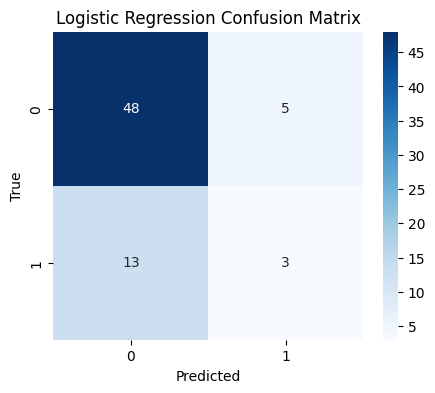

In [ ]:
# TF-IDF logistic regression baseline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare text
X_train = train_df["clean_text"].astype(str).values
y_train = train_df["label"].astype(int).values
X_val = val_df["clean_text"].astype(str).values
y_val = val_df["label"].astype(int).values
X_test = test_df["clean_text"].astype(str).values
y_test = test_df["label"].astype(int).values

# Vectorize
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train with class_weight balanced (handles imbalance)
lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
lr.fit(X_train_tfidf, y_train)

# Evaluate
y_pred = lr.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression Accuracy:", acc)
print(report)

# Save model + vectorizer + report
joblib.dump(lr, "models/logistic_regression.joblib")
joblib.dump(vectorizer, "models/tfidf_vectorizer.joblib")
with open("results/logistic_report.txt", "w") as f:
    f.write("Accuracy: {}\n\n".format(acc))
    f.write(report)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Logistic Regression Confusion Matrix")
plt.savefig("results/logistic_confusion.png", bbox_inches='tight')
plt.show()


In [ ]:
import transformers
transformers.__version__


'4.57.1'

In [ ]:
!pip install -U transformers


In [ ]:
from transformers import TrainingArguments


In [ ]:
training_args = TrainingArguments(
    output_dir="models/bert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="logs",
    logging_steps=50
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
import transformers
print("Transformers Version:", transformers.__version__)
print("Library Path:", transformers.__file__)


Transformers Version: 4.57.1
Library Path: /usr/local/lib/python3.12/dist-packages/transformers/__init__.py


In [ ]:
training_args = TrainingArguments(
    output_dir="models/bert_results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,

    # updated argument names for 4.57.1
    eval_strategy="epoch",
    save_strategy="epoch",

    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
training_args = TrainingArguments(
    output_dir="models/bert_results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,

    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",

    report_to="none"  # disable W&B, Comet, etc.
)


In [ ]:
import os

print("Processed folder:", os.listdir("/content/data/processed"))
print("Snopes folder:", os.listdir("/content/data/processed/snopes_medical"))
print("Outputs folder:", os.listdir("/content/data/processed/snopes_medical/outputs"))


Processed folder: ['snopes_medical']
Snopes folder: ['outputs']
Outputs folder: ['images', 'data.csv', 'test.csv', 'val.csv', 'train.csv']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ---------------------------
# 1. Load Train / Val / Test
# ---------------------------

base_path = "/content/data/processed/snopes_medical/outputs/"

train_df = pd.read_csv(base_path + "train.csv")
val_df   = pd.read_csv(base_path + "val.csv")
test_df  = pd.read_csv(base_path + "test.csv")

print("Train:", train_df.shape)
print("Val:", val_df.shape)
print("Test:", test_df.shape)

# ---------------------------
# 2. Combine Title + Body
# ---------------------------

def combine(row):
    return str(row["Title"]) + " " + str(row["Body"])

train_df["combined_text"] = train_df.apply(combine, axis=1)
val_df["combined_text"]   = val_df.apply(combine, axis=1)
test_df["combined_text"]  = test_df.apply(combine, axis=1)

# ---------------------------
# 3. Logistic Regression
# ---------------------------

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train = vectorizer.fit_transform(train_df["combined_text"])
X_val   = vectorizer.transform(val_df["combined_text"])
X_test  = vectorizer.transform(test_df["combined_text"])

clf = LogisticRegression(max_iter=300)
clf.fit(X_train, train_df["label"])

print("\n🔍 LOGISTIC REGRESSION RESULTS")
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(test_df["label"], preds))
print(classification_report(test_df["label"], preds))

# ---------------------------
# 4. BERT (DistilBERT)
# ---------------------------

from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["combined_text"].tolist(), padding=True, truncation=True, max_length=256)

train_enc = tokenize(train_df)
val_enc   = tokenize(val_df)
test_enc  = tokenize(test_df)

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_enc["input_ids"]),
    torch.tensor(train_enc["attention_mask"]),
    torch.tensor(train_df["label"].values)
)

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(val_enc["input_ids"]),
    torch.tensor(val_enc["attention_mask"]),
    torch.tensor(val_df["label"].values)
)

test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_enc["input_ids"]),
    torch.tensor(test_enc["attention_mask"]),
    torch.tensor(test_df["label"].values)
)

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

training_args = TrainingArguments(
    output_dir="./bert_results",
    logging_steps=20,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    report_to="none",       # disable wandb warning
    save_total_limit=1,
    load_best_model_at_end=False
)

def collator(batch):
    return {
        "input_ids": torch.stack([x[0] for x in batch]),
        "attention_mask": torch.stack([x[1] for x in batch]),
        "labels": torch.tensor([x[2].item() for x in batch])
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=collator
)

trainer.train()

# ---------------------------
# 5. Evaluate BERT
# ---------------------------

outputs = trainer.predict(test_dataset)
bert_preds = np.argmax(outputs.predictions, axis=1)

print("\n🔍 BERT RESULTS")
print("Accuracy:", accuracy_score(test_df["label"], bert_preds))
print(classification_report(test_df["label"], bert_preds))


Train: (319, 9)
Val: (69, 9)
Test: (69, 9)

🔍 LOGISTIC REGRESSION RESULTS
Accuracy: 0.7681159420289855
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        53
           1       0.00      0.00      0.00        16

    accuracy                           0.77        69
   macro avg       0.38      0.50      0.43        69
weighted avg       0.59      0.77      0.67        69



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Some weights of DistilBertForSequenceClassificati

Step,Training Loss
20,0.588500
40,0.470200
60,0.433200
80,0.305100


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



🔍 BERT RESULTS
Accuracy: 0.7681159420289855
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        53
           1       0.50      0.19      0.27        16

    accuracy                           0.77        69
   macro avg       0.65      0.57      0.57        69
weighted avg       0.73      0.77      0.73        69



In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [ ]:
import os

for root, dirs, files in os.walk("/content", topdown=True):
    print(root, dirs, files)


/content ['.config', 'sample_data'] ['Image_and_Text_Fake_News_Detection_Dataset.zip']
/content/.config ['configurations', 'logs'] ['.last_opt_in_prompt.yaml', 'active_config', 'config_sentinel', '.last_survey_prompt.yaml', 'default_configs.db', 'hidden_gcloud_config_universe_descriptor_data_cache_configs.db', '.last_update_check.json', 'gce']
/content/.config/configurations [] ['config_default']
/content/.config/logs ['2025.11.17'] []
/content/.config/logs/2025.11.17 [] ['14.29.23.259453.log', '14.29.31.632779.log', '14.29.13.881355.log', '14.29.22.058366.log', '14.28.51.290851.log', '14.29.32.306715.log']
/content/sample_data [] ['README.md', 'anscombe.json', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_train.csv', 'california_housing_test.csv']


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

vgg = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
out = Dense(1, activation="sigmoid")(x)

vgg_model = Model(inputs=vgg.input, outputs=out)

vgg_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history_vgg = vgg_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=6,
    batch_size=16
)

vgg_results = vgg_model.evaluate(X_test, y_test)
print("VGG16 Accuracy:", vgg_results)


NameError: name 'X_train' is not defined